**Ondrej Harnúšek**

**Bakalárska práca: Nástroj na určovanie podobnosti textov**

**máj 2019**

****

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
# Transformuje bool hodnoty na reťazce v slovenčine
def translate_bool(var):
  return "áno" if var==True else 'nie'

In [0]:
# Transformuje premenné na reťazce v slovenčine
def translate_parm(var):
  if var == "use_lem":
    return "lematizácie"
  if var == "use_pos":
    return "slovných druhov"
  if var == "use_stop":
    return "stop slov"

# Analýza korpusu vybraných viet

In [0]:
sents_lens_man_eval = [23, 24, 15, 9, 10, 10, 13, 5, 10, 8, 4, 9, 10, 9, 16, 22, 19, 14, 9, 6, 7, 10, 4, 15, 6, 14, 11, 13, 11, 8, 4, 9, 6, 7,
                       5, 7, 6, 5, 7, 20, 9, 9, 5, 17, 11, 15, 8, 4, 12, 25, 13, 18, 13, 12, 17, 8, 6, 9, 8, 20, 6, 14, 9, 23, 13, 12, 15, 10,
                       6, 6, 7, 10, 8, 11, 10, 7, 6, 9, 6, 8, 13, 11, 7, 8, 17, 5, 8, 10, 7, 9, 10, 8, 9, 9, 7, 9, 10, 9, 9, 11, 13, 11, 15, 7,
                       12, 13, 16, 19, 20, 13, 34, 13, 13, 16, 7, 7, 14, 23, 10, 6, 10, 17, 10, 11, 10, 7, 13, 10, 8, 9, 7, 26, 16, 8, 5, 4, 4,
                       15, 10, 28, 9, 7, 12, 19, 6, 13, 9, 10, 8, 7, 4, 20, 16, 5, 9, 17, 12, 8, 6, 6, 14, 5, 13, 11, 15, 13, 10, 11, 7, 8, 7,
                       7, 8, 8, 7, 7, 15, 23, 15, 7, 9, 7, 16, 15, 9, 11, 8, 11, 16, 9, 22, 9, 20, 13, 11, 13, 11, 12, 10, 7]

**Zoznam počtu slov vo vybraných vetách**

In [0]:
len(sents_lens_man_eval)

200

**Bolo vybraných 100 párov viet**

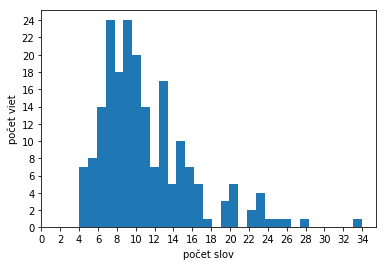

In [0]:
plt.hist(sents_lens_man_eval, bins=32)
plt.xlabel('počet slov')
plt.ylabel('počet viet')
plt.xticks(list(range(0,35,2)))
plt.yticks(list(range(0,25,2)))
plt.show()

**Histogram počtu slov vo vetách**

In [0]:
print("Medián počtu slov: ",np.median(sents_lens_man_eval))

Medián počtu slov:  10.0


In [0]:
print("Najmenší počet slov: ",min(sents_lens_man_eval))

Najmenší počet slov:  4


In [0]:
print("Najväčší počet slov: ",max(sents_lens_man_eval))

Najväčší počet slov:  34


# Analýza dát od účastníkov experimentu

In [0]:
all_sims = [[0.0, 2.0, 0.0, 1.0, 1.0], [2.0, 1.0, 3.0, 3.0, 1.0], [4.0, 4.0, 2.0, 4.0, 2.0], [3.0, 2.0, 3.0, 2.0, 1.0], [3.0, 2.0, 3.0, 3.0, 3.0], 
            [2.0, 2.0, 2.0, 2.0, 1.0], [0.0, 1.0, 3.0, 1.0, 2.0], [0.0, 1.0, 0.0, 0.0, 0.0], [2.0, 2.0, 1.0, 2.0, 1.0], [1.0, 1.0, 1.0, 1.0, 0.0], 
            [2.0, 1.0, 1.0, 4.0, 3.0], [1.0, 0.0, 3.0, 0.0, 0.0], [1.0, 1.0, 1.0, 0.0, 0.0], [1.0, 0.0, 1.0, 1.0, 0.0], [4.0, 2.0, 3.0, 4.0, 3.0], 
            [0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 2.0, 1.0, 0.0, 0.0], [4.0, 2.0, 3.0, 4.0, 3.0], [3.0, 1.0, 1.0, 3.0, 1.0], [2.0, 3.0, 1.0, 1.0, 0.0], 
            [4.0, 2.0, 2.0, 4.0, 3.0], [3.0, 2.0, 3.0, 3.0, 3.0], [2.0, 1.0, 1.0, 1.0, 0.0], [0.0, 1.0, 1.0, 0.0, 0.0], [0.0, 3.0, 2.0, 0.0, 0.0], 
            [1.0, 1.0, 1.0, 0.0, 1.0], [1.0, 2.0, 1.0, 0.0, 0.0], [0.0, 3.0, 0.0, 0.0, 0.0], [3.0, 4.0, 3.0, 4.0, 2.0], [3.0, 2.0, 3.0, 2.0, 3.0],
            [2.0, 1.0, 1.0, 1.0, 2.0], [0.0, 3.0, 1.0, 1.0, 0.0], [4.0, 2.0, 3.0, 4.0, 3.0], [1.0, 2.0, 1.0, 1.0, 1.0], [4.0, 2.0, 1.0, 3.0, 1.0], 
            [3.0, 4.0, 2.0, 3.0, 3.0], [3.0, 2.0, 3.0, 2.0, 1.0], [3.0, 3.0, 1.0, 4.0, 3.0], [4.0, 4.0, 3.0, 3.0, 3.0], [2.0, 2.0, 0.0, 2.0, 1.0],
            [1.0, 2.0, 0.0, 3.0, 1.0], [4.0, 3.0, 3.0, 3.0, 2.0], [3.0, 2.0, 3.0, 4.0, 3.0], [3.0, 1.0, 2.0, 2.0, 3.0], [0.0, 2.0, 2.0, 2.0, 0.0], 
            [1.0, 3.0, 1.0, 1.0, 1.0], [0.0, 1.0, 3.0, 2.0, 0.0], [0.0, 2.0, 1.0, 2.0, 1.0], [1.0, 2.0, 3.0, 3.0, 1.0], [0.0, 1.0, 1.0, 4.0, 2.0], 
            [3.0, 1.0, 2.0, 3.0, 1.0], [2.0, 2.0, 1.0, 4.0, 1.0], [0.0, 2.0, 0.0, 3.0, 0.0], [1.0, 0.0, 1.0, 2.0, 1.0], [0.0, 1.0, 1.0, 0.0, 0.0], 
            [0.0, 0.0, 0.0, 1.0, 1.0], [0.0, 1.0, 0.0, 2.0, 0.0], [1.0, 2.0, 1.0, 4.0, 2.0], [0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 2.0, 1.0, 3.0, 1.0], 
            [1.0, 1.0, 1.0, 1.0, 3.0], [2.0, 1.0, 1.0, 3.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0], [3.0, 1.0, 1.0, 4.0, 2.0], [0.0, 2.0, 1.0, 0.0, 0.0], 
            [1.0, 2.0, 1.0, 1.0, 1.0], [0.0, 2.0, 0.0, 2.0, 1.0], [4.0, 3.0, 3.0, 4.0, 3.0], [2.0, 1.0, 1.0, 2.0, 2.0], [1.0, 1.0, 0.0, 3.0, 0.0], 
            [1.0, 2.0, 1.0, 2.0, 0.0], [0.0, 1.0, 0.0, 1.0, 0.0], [2.0, 2.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 0.0, 0.0], [1.0, 2.0, 1.0, 2.0, 1.0], 
            [0.0, 1.0, 1.0, 0.0, 1.0], [4.0, 2.0, 1.0, 4.0, 3.0], [2.0, 2.0, 2.0, 2.0, 2.0], [0.0, 2.0, 0.0, 0.0, 0.0], [1.0, 3.0, 2.0, 1.0, 0.0],
            [1.0, 3.0, 2.0, 1.0, 1.0], [0.0, 3.0, 2.0, 0.0, 0.0], [3.0, 2.0, 3.0, 4.0, 3.0], [1.0, 3.0, 2.0, 0.0, 1.0], [3.0, 4.0, 2.0, 4.0, 2.0],
            [1.0, 2.0, 2.0, 1.0, 0.0], [0.0, 3.0, 2.0, 1.0, 0.0], [2.0, 4.0, 4.0, 3.0, 1.0], [0.0, 3.0, 0.0, 1.0, 0.0], [1.0, 2.0, 1.0, 0.0, 0.0],
            [2.0, 2.0, 0.0, 2.0, 3.0], [2.0, 1.0, 1.0, 3.0, 2.0], [4.0, 2.0, 3.0, 4.0, 3.0], [3.0, 2.0, 2.0, 3.0, 3.0], [4.0, 4.0, 1.0, 4.0, 3.0],
            [1.0, 2.0, 1.0, 3.0, 1.0], [1.0, 1.0, 2.0, 2.0, 3.0], [1.0, 2.0, 1.0, 4.0, 3.0], [0.0, 0.0, 1.0, 2.0, 0.0], [3.0, 4.0, 2.0, 3.0, 2.0]]

**Stupňe (0/1/2/3/4) sémantickej podobnosti vybraných viet zadaných účastníkmi experimentu**

In [0]:
print("počet vybraných dvojíc viet: ",len(all_sims))
print("počet účastníkov experimentu: ", len(all_sims[0]))

počet vybraných dvojíc viet:  100
počet účastníkov experimentu:  5


In [4]:
names = ["účastník "+ str(i) for i in range(1,6)]
names

['účastník 1', 'účastník 2', 'účastník 3', 'účastník 4', 'účastník 5']

**Účastníci experimentu**

In [0]:
avg_sims = [(sum(values)/len(values))/4 for values in all_sims]

**Priemerné hodnoty (z intervalu 0 až 1) sémantickej podobnosti viet **

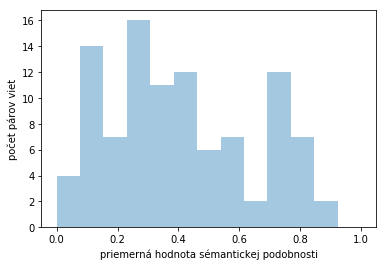

In [0]:
sns.distplot(avg_sims, kde=False, bins=13, hist_kws={"range": [0,1]}, )
plt.ylabel('počet párov viet')
plt.xlabel('priemerná hodnota sémantickej podobnosti')
plt.show()

**Rozloženie priemerných hodnôt podobnosti vybraných viet**

In [0]:
print("Medián hodnôt priemernej sémantickej podobnosti: ",np.median(avg_sims))

Medián hodnôt priemernej sémantickej podobnosti:  0.35


In [0]:
print("Najmenšia hodnota sémantickej podobnosti: ",min(avg_sims))

Najmenšia hodnota sémantickej podobnosti:  0.0


In [0]:
print("Najväčšia hodnota sémantickej podobnosti: ",max(avg_sims))

Najväčšia hodnota sémantickej podobnosti:  0.85


### **Histogram stupňov podobnosti vybraných viet zadaných účastníkom "i"**

In [0]:
# Vykreslí histogram stupňov (0/1/2/3/4) sémantickej podobnosti vybraných viet zadaných účastníkom "i"**
def hist(i):
  plt.figure()
  plt.hist([x[i] for x in all_sims], bins=5, range=(0,4))
  print(names[i])
  plt.ylabel('počet párov viet')
  plt.xlabel('stupeň sémantickej podobnosti')
  plt.show()

účastník 1


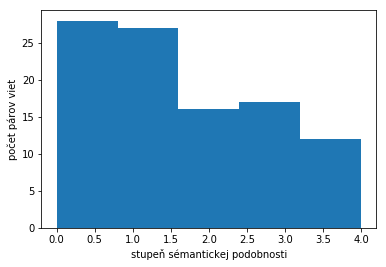

In [6]:
hist(0)

účastník 2


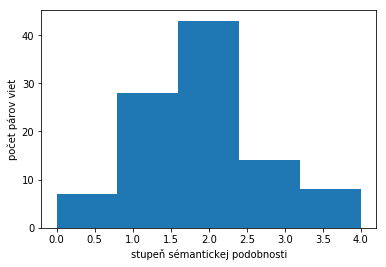

In [7]:
hist(1)

účastník 3


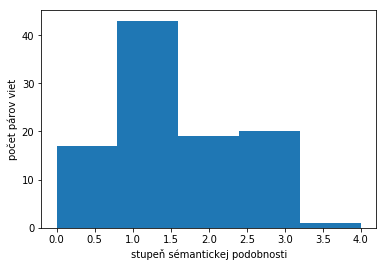

In [8]:
hist(2)

účastník 4


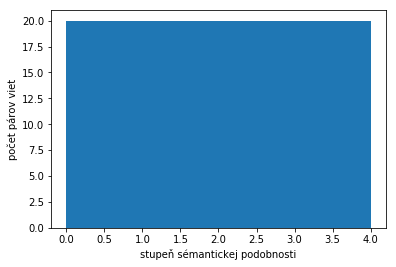

In [9]:
hist(3)

účastník 5


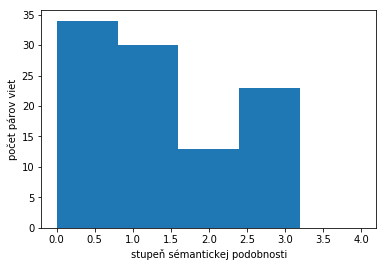

In [10]:
hist(4)

### **Priemerný absolútny rozdiel medzi hodnotou  účastníka "i" a priemernou hodnotou všetkých účastníkov**

In [0]:
# Vykreslí rozloženie rozdielov hodnôt zadaných účastníkom "i" a priemerných hodnôt
def dist(i):
  diffs = []
  for x in all_sims:
    avgx = (sum(x)/len(x))/4 
    diff = avgx-(x[i]/4)
    diffs.append(abs(diff))
  avg_diff = sum(diffs)/len(diffs)
  print(names[i],"\npriemer absolútnych odchýlok od priemernej hodnoty: ", round(avg_diff,4))  
  sns.distplot(diffs, kde=False)
  plt.ylabel('počet párov viet')
  plt.xlabel('absolútna odchýlka od priemernej hodnoty')
  plt.show()

účastník 1 
priemer absolútnych odchýlok od priemernej hodnoty:  0.14


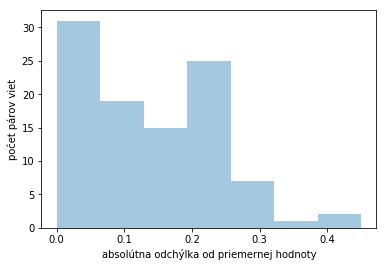

In [0]:
dist(0)

účastník 2 
priemer absolútnych odchýlok od priemernej hodnoty:  0.198


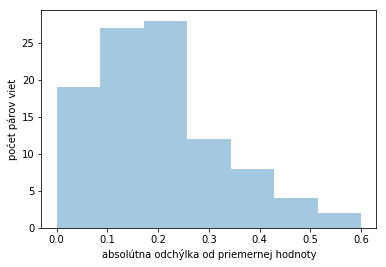

In [0]:
dist(1)

účastník 3 
priemer absolútnych odchýlok od priemernej hodnoty:  0.1575


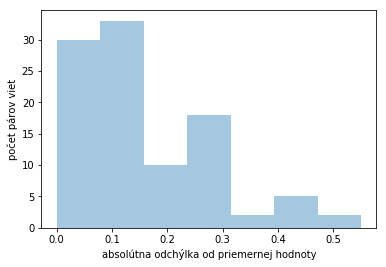

In [0]:
dist(2)

účastník 4 
priemer absolútnych odchýlok od priemernej hodnoty:  0.18


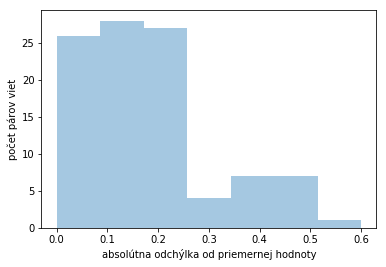

In [0]:
dist(3)

účastník 5 
priemer absolútnych odchýlok od priemernej hodnoty:  0.1535


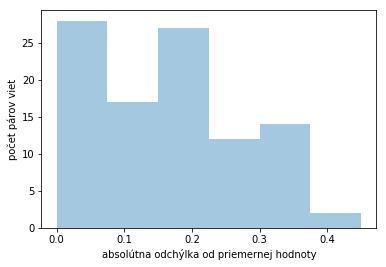

In [0]:
dist(4)

Celkový priemer absolútnych odchýlok od priemernej hodnoty:  0.1658


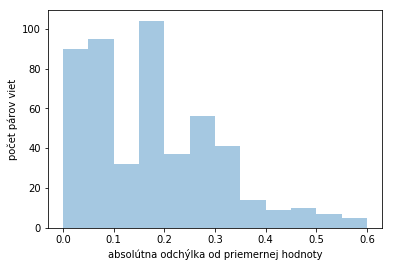

In [0]:
diffs = []
for x in all_sims:
  avgx = (sum(x)/len(x))/4
  for s in x:
    diff = avgx-(s/4)
    diffs.append(abs(diff))
avg_diff = sum(diffs)/len(diffs)
print("Celkový priemer absolútnych odchýlok od priemernej hodnoty: ", round(avg_diff,4))  
sns.distplot(diffs, kde=False)
plt.ylabel('počet párov viet')
plt.xlabel('absolútna odchýlka od priemernej hodnoty')
plt.show()

**Celkový priemer rozdielu hodnôt všetkých účastníkov a priemerných hodnôt**

# Analýza výsledkov automatickej evaluácie

In [0]:
auto_eval = pd.read_excel("results.xlsx", sheet_name="auto-eval")

In [0]:
# Funkcia vypíše porovnanie úspešnosti s a bez použitia parametru
def parameter_compare_auto(data, parameter):
  diff_diffs = []
  print('Porovnanie parametru:', parameter)
  parms = ['use_lem','use_pos','use_stop']
  parms.remove(parameter)
  alfa_parm = parms[0]
  beta_parm = parms[1]
  columns = ['použitie '+translate_parm(alfa_parm), 'použitie '+translate_parm(beta_parm), 
             'úspešnosť s použitím '+translate_parm(parameter), 'úspešnosť bez použitia '+translate_parm(parameter), 'zvýšenie úspešnosti']
  output = pd.DataFrame(columns=columns)
  for alfa_bool in [True, False]:
    for beta_bool in [True, False]:
      diff_T = data.loc[(data[alfa_parm] == alfa_bool) & (data[beta_parm] == beta_bool) & (data[parameter] == True), 'diff'].tolist()[0]
      diff_F = data.loc[(data[alfa_parm] == alfa_bool) & (data[beta_parm] == beta_bool) & (data[parameter] == False), 'diff'].tolist()[0]
      line = pd.DataFrame([[translate_bool(alfa_bool), translate_bool(beta_bool), diff_T, diff_F, round(diff_T-diff_F,4)]], columns=columns)
      output = output.append(line)
      diff_diffs.append(diff_T-diff_F)
  print('priemerná hodnota zvýšenia úspešnosti', round(sum(diff_diffs)/len(diff_diffs),4))
  diff_diffs = [abs(x) for x in diff_diffs]
  print('priemerná absolútna hodnota zvýšenia úspešnosti', round(sum(diff_diffs)/len(diff_diffs),4))
  return output

## korpusová metóda

In [0]:
corpusSim_auto = auto_eval[auto_eval['method'] == 'corpusSim']
corpusSim_auto

,method,use_lem,use_pos,use_stop,diff
0,corpusSim,True,True,True,0.1417
1,corpusSim,True,True,False,0.1707
2,corpusSim,True,False,True,0.1606
3,corpusSim,True,False,False,0.1706
4,corpusSim,False,True,True,0.1734
5,corpusSim,False,True,False,0.2014
6,corpusSim,False,False,True,0.1715
7,corpusSim,False,False,False,0.1780


**Výsledky automatickej evaluácie korpusovej metódy**

### 1. parameter

In [0]:
parameter_compare_auto(corpusSim_auto, 'use_lem')

Porovnanie parametru: use_lem
priemerná hodnota zvýšenia úspešnosti -0.0202
priemerná absolútna hodnota zvýšenia úspešnosti 0.0202


,použitie slovných druhov,použitie stop slov,úspešnosť s použitím lematizácie,úspešnosť bez použitia lematizácie,zvýšenie úspešnosti
0,áno,áno,0.1417,0.1734,-0.0317
0,áno,nie,0.1707,0.2014,-0.0307
0,nie,áno,0.1606,0.1715,-0.0109
0,nie,nie,0.1706,0.1780,-0.0074


**Použitie lematizácie pri korpusovej metóde znižuje úspešnosť**

### 2. parameter

In [0]:
parameter_compare_auto(corpusSim_auto, 'use_stop')

Porovnanie parametru: use_stop
priemerná hodnota zvýšenia úspešnosti -0.0184
priemerná absolútna hodnota zvýšenia úspešnosti 0.0184


,použitie lematizácie,použitie slovných druhov,úspešnosť s použitím stop slov,úspešnosť bez použitia stop slov,zvýšenie úspešnosti
0,áno,áno,0.1417,0.1707,-0.0290
0,áno,nie,0.1606,0.1706,-0.0100
0,nie,áno,0.1734,0.2014,-0.0280
0,nie,nie,0.1715,0.1780,-0.0065


**Použitie stop slov pri korpusovej metóde znižuje úspešnosť** 


### 3. parameter

In [0]:
parameter_compare_auto(corpusSim_auto, 'use_pos')

Porovnanie parametru: use_pos
priemerná hodnota zvýšenia úspešnosti 0.0016
priemerná absolútna hodnota zvýšenia úspešnosti 0.0111


,použitie lematizácie,použitie stop slov,úspešnosť s použitím slovných druhov,úspešnosť bez použitia slovných druhov,zvýšenie úspešnosti
0,áno,áno,0.1417,0.1606,-0.0189
0,áno,nie,0.1707,0.1706,0.0001
0,nie,áno,0.1734,0.1715,0.0019
0,nie,nie,0.2014,0.1780,0.0234


**Použitie slovných druhov pri korpusovej metóde zvyšuje úspešnosť** **- okrem použitia s lematizáciou a stop slovami**


## znalostná metóda

In [0]:
knowledgeSim_auto = auto_eval[auto_eval['method'] == 'knowledgeSim']
knowledgeSim_auto

,method,use_lem,use_pos,use_stop,diff
8,knowledgeSim,True,True,True,0.1378
9,knowledgeSim,True,True,False,0.1812
10,knowledgeSim,True,False,True,0.1454
11,knowledgeSim,True,False,False,0.1614
12,knowledgeSim,False,True,True,0.1622
13,knowledgeSim,False,True,False,0.1540
14,knowledgeSim,False,False,True,0.1368
15,knowledgeSim,False,False,False,0.1369


**Výsledky automatickej evaluácie znalostnej metódy**

### 1. parameter

In [0]:
parameter_compare_auto(knowledgeSim_auto, 'use_pos')

Porovnanie parametru: use_pos
priemerná hodnota zvýšenia úspešnosti 0.0137
priemerná absolútna hodnota zvýšenia úspešnosti 0.0175


,použitie lematizácie,použitie stop slov,úspešnosť s použitím slovných druhov,úspešnosť bez použitia slovných druhov,zvýšenie úspešnosti
0,áno,áno,0.1378,0.1454,-0.0076
0,áno,nie,0.1812,0.1614,0.0198
0,nie,áno,0.1622,0.1368,0.0254
0,nie,nie,0.1540,0.1369,0.0171


**Použitie slovných druhov pri znalostnej metóde zvyšuje úspešnosť** **- okrem použitia s lematizáciou a stop slovami**

### 2. parameter

In [0]:
parameter_compare_auto(knowledgeSim_auto, 'use_stop')

Porovnanie parametru: use_stop
priemerná hodnota zvýšenia úspešnosti -0.0128
priemerná absolútna hodnota zvýšenia úspešnosti 0.0169


,použitie lematizácie,použitie slovných druhov,úspešnosť s použitím stop slov,úspešnosť bez použitia stop slov,zvýšenie úspešnosti
0,áno,áno,0.1378,0.1812,-0.0434
0,áno,nie,0.1454,0.1614,-0.0160
0,nie,áno,0.1622,0.1540,0.0082
0,nie,nie,0.1368,0.1369,-0.0001


**Použitie stop slov pri znalostnej metóde znižuje úspešnosť** **- okrem použitia so slovnými druhmi a bez lematizácie**

### 3. parameter

In [0]:
parameter_compare_auto(knowledgeSim_auto, 'use_lem')

Porovnanie parametru: use_lem
priemerná hodnota zvýšenia úspešnosti 0.009
priemerná absolútna hodnota zvýšenia úspešnosti 0.0212


,použitie slovných druhov,použitie stop slov,úspešnosť s použitím lematizácie,úspešnosť bez použitia lematizácie,zvýšenie úspešnosti
0,áno,áno,0.1378,0.1622,-0.0244
0,áno,nie,0.1812,0.1540,0.0272
0,nie,áno,0.1454,0.1368,0.0086
0,nie,nie,0.1614,0.1369,0.0245


**Použitie lematizácie pri znalostnej metóde zvyšuje úspešnosť** **- okrem použitia so slovnými druhmi a stop slovami**

# Analýza výsledkov manuálnej evaluácie

In [0]:
man_eval = pd.read_excel("results.xlsx", sheet_name="man-eval")

In [0]:
# Funkcia vypíše porovnanie chyby s a bez použitia parametru
def parameter_compare_man(data, parameter):
  error_diffs = []
  print('Porovnanie parametru:', parameter)
  parms = ['use_lem','use_pos','use_stop']
  parms.remove(parameter)
  alfa_parm = parms[0]
  beta_parm = parms[1]
  columns = ['použitie '+translate_parm(alfa_parm), 'použitie '+translate_parm(beta_parm), 
             'úspešnosť s použitím '+translate_parm(parameter), 'úspešnosť bez použitia '+translate_parm(parameter), 'zníženie chyby']
  output = pd.DataFrame(columns=columns)
  for alfa_bool in [True, False]:
    for beta_bool in [True, False]:
      error_T = data.loc[(data[alfa_parm] == alfa_bool) & (data[beta_parm] == beta_bool) & (data[parameter] == True), 'error'].tolist()[0]
      error_F = data.loc[(data[alfa_parm] == alfa_bool) & (data[beta_parm] == beta_bool) & (data[parameter] == False), 'error'].tolist()[0]
      line = pd.DataFrame([[translate_bool(alfa_bool), translate_bool(beta_bool), error_T, error_F, round(error_F-error_T,4)]], columns=columns)
      output = output.append(line)
      error_diffs.append(error_F-error_T)
  print('priemerná hodnota zvýšenia úspešnosti', round(sum(error_diffs)/len(error_diffs),4))
  error_diffs = [abs(x) for x in error_diffs]
  print('priemerná absolútna hodnota zvýšenia úspešnosti', round(sum(error_diffs)/len(error_diffs),4))
  return output

## korpusová metóda

In [0]:
corpusSim_man = man_eval[man_eval['method'] == 'corpusSim']
corpusSim_man

,method,use_lem,use_pos,use_stop,error
0,corpusSim,True,True,True,0.1541
1,corpusSim,True,True,False,0.1597
2,corpusSim,True,False,True,0.1593
3,corpusSim,True,False,False,0.1570
4,corpusSim,False,True,True,0.1746
5,corpusSim,False,True,False,0.1980
6,corpusSim,False,False,True,0.1663
7,corpusSim,False,False,False,0.1666


**Výsledky manuálnej evaluácie korpusovej metódy**

### 1. parameter

In [0]:
parameter_compare_man(corpusSim_man, 'use_lem')

Porovnanie parametru: use_lem
priemerná hodnota zvýšenia úspešnosti 0.0189
priemerná absolútna hodnota zvýšenia úspešnosti 0.0189


,použitie slovných druhov,použitie stop slov,úspešnosť s použitím lematizácie,úspešnosť bez použitia lematizácie,zníženie chyby
0,áno,áno,0.1541,0.1746,0.0205
0,áno,nie,0.1597,0.1980,0.0383
0,nie,áno,0.1593,0.1663,0.0070
0,nie,nie,0.1570,0.1666,0.0096


**Použitie lematizácie pri korpusovej metóde znižuje chybu**

### 2. parameter

In [0]:
parameter_compare_man(corpusSim_man, 'use_pos')

Porovnanie parametru: use_pos
priemerná hodnota zvýšenia úspešnosti -0.0093
priemerná absolútna hodnota zvýšenia úspešnosti 0.0119


,použitie lematizácie,použitie stop slov,úspešnosť s použitím slovných druhov,úspešnosť bez použitia slovných druhov,zníženie chyby
0,áno,áno,0.1541,0.1593,0.0052
0,áno,nie,0.1597,0.1570,-0.0027
0,nie,áno,0.1746,0.1663,-0.0083
0,nie,nie,0.1980,0.1666,-0.0314


**Použitie slovných druhov pri korpusovej metóde zvyšuje chybu** **- okrem použitia s lematizáciou a stop slovami**

### 3. parameter

In [0]:
parameter_compare_man(corpusSim_man, 'use_stop')

Porovnanie parametru: use_stop
priemerná hodnota zvýšenia úspešnosti 0.0068
priemerná absolútna hodnota zvýšenia úspešnosti 0.0079


,použitie lematizácie,použitie slovných druhov,úspešnosť s použitím stop slov,úspešnosť bez použitia stop slov,zníženie chyby
0,áno,áno,0.1541,0.1597,0.0056
0,áno,nie,0.1593,0.1570,-0.0023
0,nie,áno,0.1746,0.1980,0.0234
0,nie,nie,0.1663,0.1666,0.0003


**Použitie stop slov pri korpusovej metóde znižuje chybu** **- okrem použitia s lematizáciou a bez slovných druhov**

## znalostná metóda

In [0]:
knowledgeSim_man = man_eval[man_eval['method'] == 'knowledgeSim']
knowledgeSim_man

,method,use_lem,use_pos,use_stop,error
8,knowledgeSim,True,True,True,0.2249
9,knowledgeSim,True,True,False,0.2636
10,knowledgeSim,True,False,True,0.1808
11,knowledgeSim,True,False,False,0.2005
12,knowledgeSim,False,True,True,0.2899
13,knowledgeSim,False,True,False,0.3216
14,knowledgeSim,False,False,True,0.2170
15,knowledgeSim,False,False,False,0.2425


**Výsledky manuálnej evaluácie znalostnej metódy**

### 1. parameter

In [0]:
parameter_compare_man(knowledgeSim_man, 'use_pos')

Porovnanie parametru: use_pos
priemerná hodnota zvýšenia úspešnosti -0.0648
priemerná absolútna hodnota zvýšenia úspešnosti 0.0648


,použitie lematizácie,použitie stop slov,úspešnosť s použitím slovných druhov,úspešnosť bez použitia slovných druhov,zníženie chyby
0,áno,áno,0.2249,0.1808,-0.0441
0,áno,nie,0.2636,0.2005,-0.0631
0,nie,áno,0.2899,0.2170,-0.0729
0,nie,nie,0.3216,0.2425,-0.0791


**Použitie slovných druhov pri znalostnej metóde zvyšuje chybu**

### 2. parameter

In [0]:
parameter_compare_man(knowledgeSim_man, 'use_lem')

Porovnanie parametru: use_lem
priemerná hodnota zvýšenia úspešnosti 0.0503
priemerná absolútna hodnota zvýšenia úspešnosti 0.0503


,použitie slovných druhov,použitie stop slov,úspešnosť s použitím lematizácie,úspešnosť bez použitia lematizácie,zníženie chyby
0,áno,áno,0.2249,0.2899,0.0650
0,áno,nie,0.2636,0.3216,0.0580
0,nie,áno,0.1808,0.2170,0.0362
0,nie,nie,0.2005,0.2425,0.0420


**Použitie lematizácie pri znalostnej metóde znižuje chybu**

### 3 parameter.

In [0]:
parameter_compare_man(knowledgeSim_man, 'use_stop')

Porovnanie parametru: use_stop
priemerná hodnota zvýšenia úspešnosti 0.0289
priemerná absolútna hodnota zvýšenia úspešnosti 0.0289


,použitie lematizácie,použitie slovných druhov,úspešnosť s použitím stop slov,úspešnosť bez použitia stop slov,zníženie chyby
0,áno,áno,0.2249,0.2636,0.0387
0,áno,nie,0.1808,0.2005,0.0197
0,nie,áno,0.2899,0.3216,0.0317
0,nie,nie,0.2170,0.2425,0.0255


**Použitie stop slov pri znalostnej metóde znižuje chybu**